In [35]:
# general libs
import itertools
import numpy as np
import pandas as pd
import datetime
from base64 import b64encode
from functools import partial


# Shapely and Rasterio for processing geometries
from shapely import geometry
from shapely.geometry import box, shape, Polygon
from shapely.ops import cascaded_union
from rasterio import features   

# GBDX
from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

# plotting libs
import tqdm
import matplotlib.pyplot as plt
from ipyleaflet import Map, WMSLayer
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import folium

# scikit-image modules for image science operators
from skimage import filters, morphology

# matplot lib settings
%matplotlib inline 

# Initialize gbdx interface
gbdx = Interface(username='vilhelm.stiernstedt@student.ie.edu',
                 password='superSNOW15@',
                 client_id='fb67ad6d-6e27-4bac-8f8c-d8e8485effa3',
                 client_secret='')

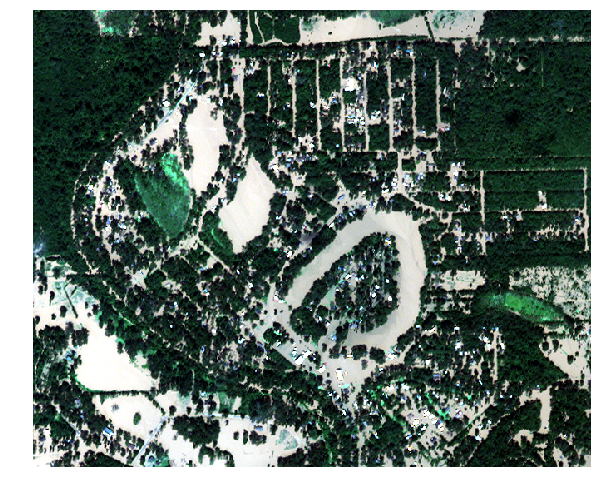

In [33]:
# Get an image
# unique DigitalGlobe image identifier
catalog_id = '103001006F31E000' 
# bounding box for area of interest
bbox = [-95.527024269104, 29.200273324360754, -95.50655364990236, 29.2170547703652] 

# create an image object
test_image = CatalogImage(catalog_id, bbox=bbox)

# plot it (may take a few seconds)
test_image.plot(w=10, h=10)

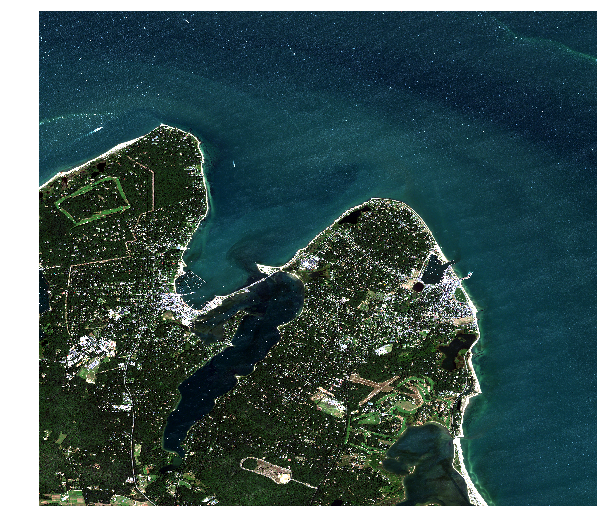

In [16]:
# CatalogImages -> pointer to desired data
catalog_id = env.inputs.get('catalog_id', '1030010006074900')

# define coordinates 
bbox = env.inputs.get('bbox', '-70.623, 41.422, -70.534, 41.501')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

In [25]:
from gbdxtools import DemImage

aoi = [5.279273986816407, 60.35854536321686, 5.402183532714844, 60.419106714507116]
dem = DemImage(aoi)
print dem.shape

TypeError: box() argument after * must be an iterable, not NoneType